In [23]:
import pandas as pd

In [24]:
df = pd.read_excel('/content/path_to_oversampled_file (1).xlsx')

In [25]:
df.head(3)

,Text,org_class
0,There must be a suitable installation for the ...,subjective
1,Between the locking points for the mortice loc...,numerical
2,The non-primary doors for entering a dwelling ...,subjective


In [26]:
# Drop the 'sub_class' column
# df = df.drop(columns=['sub_class'])

In [27]:
df

,Text,org_class
0,There must be a suitable installation for the ...,subjective
1,Between the locking points for the mortice loc...,numerical
2,The non-primary doors for entering a dwelling ...,subjective
3,The morticed bolts should have a minimum proje...,numerical
4,Reasonable provision shall be made in the desi...,subjective
...,...,...
1777,Where there is full-height structural guarding...,numerical
1778,The water heater is close to the draw-off poin...,numerical
1779,"All technically, functionally and economically...",numerical
1780,If the dwelling already has mechanical ventila...,numerical


In [28]:
df.isna().sum()

Text         13
org_class    14
dtype: int64

In [29]:
# Drop rows with missing values
df.dropna(subset=['Text', 'org_class'], inplace=True)

In [30]:
df.isna().sum()

Text         0
org_class    0
dtype: int64

In [31]:
df['org_class'].unique()

array(['subjective', 'numerical', 'combined'], dtype=object)

In [32]:
# # Mapping to correct the classes
# class_mapping = {
#     'subjective ': 'subjective',
#     'subjective': 'subjective',
#     'numerical': 'numerical',
#     'combined': 'combined'
# }

# # Apply the mapping to the 'org_class' column
# df['org_class'] = df['org_class'].map(class_mapping)

In [33]:
# df['org_class'].unique()

In [34]:
# Group the data by 'org_class' and count occurrences
class_counts = df['org_class'].value_counts()
# Display the class counts
print(class_counts)

subjective    768
numerical     600
combined      387
Name: org_class, dtype: int64


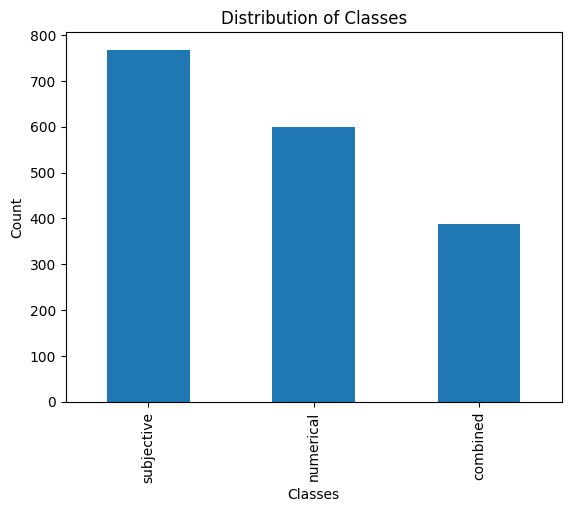

In [35]:
# Count the occurrences of each class
import matplotlib.pyplot as plt
class_counts = df['org_class'].value_counts()

# Plot the bar graph
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [36]:
x = df['Text']

In [37]:
y = df['org_class']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# using Tfidf Technique

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tf_vector = TfidfVectorizer(max_features=1000, stop_words='english')

In [42]:
x_train_tf_idf = tf_vector.fit_transform(x_train)

In [43]:
x_test_tf_idf = tf_vector.transform(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Initialize Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

In [46]:
# Train the classifier
classifier.fit(x_train_tf_idf, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
predictions = classifier.predict(x_test_tf_idf)

In [48]:
from sklearn.metrics import classification_report, accuracy_score

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [50]:
cl_report = classification_report(y_test, predictions)

In [51]:
print("Classification Report:\n", cl_report)

Classification Report:
               precision    recall  f1-score   support

    combined       0.92      1.00      0.96        85
   numerical       0.86      0.95      0.90       116
  subjective       0.97      0.85      0.90       150

    accuracy                           0.92       351
   macro avg       0.92      0.93      0.92       351
weighted avg       0.92      0.92      0.92       351



# same problem with word2vec technique

In [52]:
from gensim.models import Word2Vec
import nltk

In [53]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [55]:
def text_preprocess(text):
  words = nltk.word_tokenize(text)
  words = [word for word in words if word.lower() not in stop_words]
  return words

In [56]:
x_train_process = [text_preprocess(text) for text in x_train]

In [57]:
x_test_process = [text_preprocess(text) for text in x_test]

In [58]:
word2_vec_model = Word2Vec(sentences=x_train_process, vector_size=100, window=5, min_count=1, sg=1)

In [59]:
# Create average word vectors for each document
def document_vector(model, doc):
    vec = [model.wv[word] for word in doc if word in model.wv]
    return sum(vec) / len(vec) if vec else []

In [60]:
x_train_w2v = [document_vector(word2_vec_model, doc) for doc in x_train_process]
x_test_w2v = [document_vector(word2_vec_model, doc) for doc in x_test_process]

In [61]:
# Create and train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(x_train_w2v, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Predict on the test set
y_pred = random_forest_classifier.predict(x_test_w2v)

In [63]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

In [64]:
print("Accuracy:", accuracy)

Accuracy: 0.9344729344729344


In [65]:
classify_report = classification_report(y_test, y_pred)

In [66]:
print("Classification Report:\n", classify_report)

Classification Report:
               precision    recall  f1-score   support

    combined       0.93      1.00      0.97        85
   numerical       0.90      0.94      0.92       116
  subjective       0.96      0.89      0.93       150

    accuracy                           0.93       351
   macro avg       0.93      0.94      0.94       351
weighted avg       0.94      0.93      0.93       351



# Bert Use As a Classify

In [67]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
from sklearn.metrics import accuracy_score

In [69]:
# Load Excel data
data = pd.read_excel('/content/path_to_oversampled_file (1).xlsx')

In [70]:
# Preprocess data
data.dropna(subset=['Text', 'org_class'], inplace=True)  # Drop rows with missing values
le = LabelEncoder()
data['org_class'] = le.fit_transform(data['org_class'])

In [71]:
# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [72]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(le.classes_))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
# Tokenize and create data loaders
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

In [74]:
train_tokens = [tokenize_text(text) for text in train_data['Text']]
test_tokens = [tokenize_text(text) for text in test_data['Text']]

train_inputs = torch.cat([t['input_ids'] for t in train_tokens], dim=0)
train_masks = torch.cat([t['attention_mask'] for t in train_tokens], dim=0)
train_labels = torch.tensor(train_data['org_class'].values)

test_inputs = torch.cat([t['input_ids'] for t in test_tokens], dim=0)
test_masks = torch.cat([t['attention_mask'] for t in test_tokens], dim=0)
test_labels = torch.tensor(test_data['org_class'].values)

train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=16)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [75]:
# Training parameters
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 4

# Training loop
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        inputs, masks, labels = batch
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [76]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions = []
    for i in range(0, len(test_inputs), 16):
        batch_inputs = test_inputs[i:i + 16]
        batch_masks = test_masks[i:i + 16]
        batch_labels = test_labels[i:i + 16]
        batch_outputs = model(batch_inputs, attention_mask=batch_masks)
        batch_predictions = np.argmax(batch_outputs.logits.cpu().numpy(), axis=1)
        predictions.extend(batch_predictions)

accuracy = accuracy_score(test_labels, predictions)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.95
